<a href="https://colab.research.google.com/github/hyehyunseo/ESAA_OB/blob/main/1030_%ED%8C%8C%EB%A8%B8%EC%99%84_%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[개념 정리]**
**10/30(월) 과제 - 파이썬 머신러닝 완벽 가이드 ch8. 6 ~ 9 (7 제외)  pg. 512 ~ 516, 529 ~ 543 필사**

---

## **06. 토픽모델링 (topic modeling) - 20 뉴스 그룹**

토픽 모델링이란 문서 집합에 숨어있는 주제를 찾아내는 것이다.
* 토픽 모델링을 적용하여 많은 양의 문서에서 숨어있는 중요 주제를 효과적으로 찾아낼 수 있다.
* 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출한다.




[토픽 모델링에서 자주 사용되는 기법]
* LSA
* LDA - 차원 축소의 LDA와 다름에 유의

* 20 뉴스 그룹 데이터 세트를 이용해 적용

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 9개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x', 'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. featch_20newsgroups( ) 의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove = ('headers', 'footers', 'quotes'), categories=cats, random_state=0)

# LDA는 count기반의 벡터화만 적용
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))

feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


=> CountVectorizer 객체 변수인feat_vect 모두 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터이다. 이렇게 피처벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링을 수행한다.

=> 토픽의 개수는 위의 뉴스 그룹에서 추출한 주제와 동일하게 8개로 정한다.

In [3]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

=> LatentDirichletAllocation 객체는 components_ 속성값을 가지게 된다. components는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가진다. 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 된다.

In [4]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

=> components는 array[8, 4000]으로 구성되어 있다. 8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 가지고 있다.

=>  즉 , components_array의 0번째 row, 10번째 col에 있는 값 : Topic #0에 대해서 피처 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처가 Topic #0에 연관되는 수치 값 가지고 있다

* display_topics 함수

In [5]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes=topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 joint으로 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토빅별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


=> topic0의 경우 명확하지 않고 일반적인 단어가 주를 이룸

=> topic1의 경우 명확하게 컴퓨터 그래픽스 영역의 주제어가 추출됨

=> topic2 : 기독교, topic3 : 의학, topic4 : 윈도우 운영체제, topic5 :일반적인 단어, topic6: 중동 분쟁, topic 7: 애매하지만 윈도우 운영 체제와 관련된 주제어가 일부 추출

## **08. 문서 유사도**

### **1) 문서 유사도 측정 방법 - 코사인 유사도**

문서와 문서 간의 유사도 비교는 일반적으로 코사인 유사도를 사용한다.
* 코사인유사도는 벡터와 벡터간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반한다.
* 즉, 코사인 유사도는 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것이다.

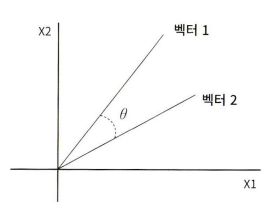

### **2) 두 벡터 사잇각**

두 벡터의 사잇각에 따라서 상호 관계는 다음과 같이 유사하거나 관련이 없거나 아예 반대 관계가 될 수 있다.

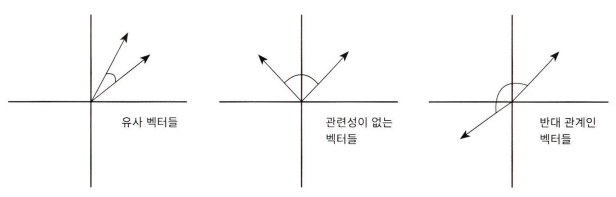

[두 벡터의 내적 구하기]

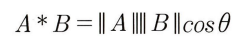

[similarity 구하기]

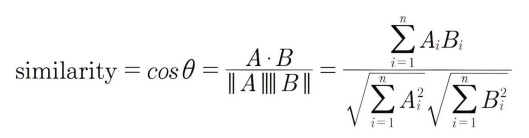

[코사인 유사도가 문서의 유사도 비교에 자주 사용되는 이유]

1. 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉽다. 이러한 희소 행렬 기반에서 문서와 문서 벡터간의 크기에 기반한 유사도 지표는 정확도가 떨어지기 쉽다.

2. 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이므로 빈도수에만 기반해서는 공정한 비교를 할 수 없다.



*  cos_similarity() 함수 작성

In [6]:
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm

  return similarity

* TF-IDF로 벡터화된 행렬로 변환

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


* 두개 문서의 유사도 측정

In [8]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환.
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


=> 첫번째 문장과 두번째 문장의 코사인 유사도는 0.402이다.

* (첫번째 문장과 세번째 문장), (두번째 문장과 세번째 문장)의 유사도 측정

In [9]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

# 두 번째 문장과 세 번째 문장의 유사도도 측정
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


=> 각각 0.404, 0.456 유사도를 가진다.

*  sklearn.metrics.pairwise.cosine_similarity API
    * 사이킷런이 코사인 유사도를 측정하기 위해 제공함
    * 희소행렬, 밀집 행렬 모두 간으해며 행렬 또는 배열도 가능함
    * cos_similarity 함수와 같이 별도의 변환 작업이 필요없음

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [11]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


* 모든 개별 문서에 쌍으로 코사인 유사도 값 계산

In [12]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### **3) Opinion Review 데이터 세트를 이용한 문서 유사도 측정**

* 데이터세트 로드 및 문서 군집화 적용

In [16]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [14]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
path = r'/content/drive/MyDrive/ESAA/OB/data/topics'
all_files=glob.glob(os.path.join(path, '*.data'))
filename_list=[]
opinion_text=[]

for file_ in all_files:
    df = pd.read_table(file_,index_col = None, header = 0,encoding = 'latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

# 피처 벡터화
tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english', \
                             ngram_range = (1,2), min_df = 0.05, max_df = 0.85)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [20]:
# 문서 군집화
km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label = 1인 데이터는 호텔로 클러스터링된 데이터임
# DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label'] == 1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링 된 데이터 중 첫번째 문서를 추출하여 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출
이를 이용하여 호텔로 클러스터링 된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([5, 10, 15, 16, 18, 31, 35, 36, 46, 49], dtype='int64')
##### 비교 기준 문서명  /content/drive/MyDrive/ESAA/OB/data/topics/interior_honda_accord_2008  와 타 문서 유사도######
[[1.         0.33044002 0.92932107 0.29443403 0.05452321 0.20216909
  0.16241477 0.0431775  0.03937962 0.17928067]]


* 첫번째 문서와 다른 문서간에 유사도가 높은 순으로 정렬하고 시각화

Text(0.5, 1.0, '/content/drive/MyDrive/ESAA/OB/data/topics/interior_honda_accord_2008')

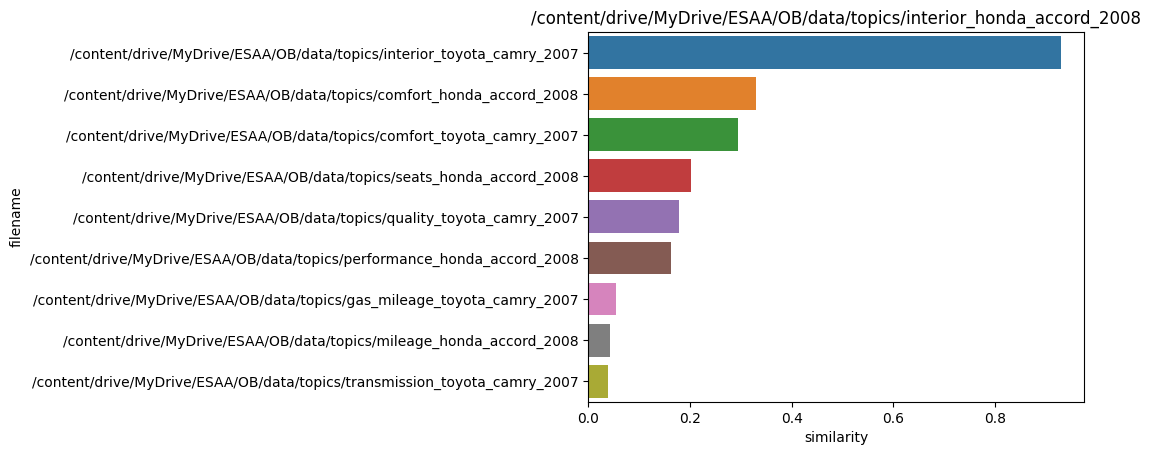

In [22]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞 예제의 첫번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 반환하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도 값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)

=> 첫번째 문서인 샌프란시스코의 베스트 웨스턴 호텔 화장실 리뷰와 가장 비슷한 문서는 room_holiday_inn_london이다.

## **09. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**

### **1) 한글 NLP 처리의 어려움**

일반적으로 한글 언어 처리는 영어 등의 라틴어 처리보다 어렵다.
* 띄어쓰기
* 다양한 조사

### **2) KoNLPy 소개**

KoNLPy는 파이썬의 대표적인 한글 형태소 패키지이다.


In [23]:
!pip install --upgrade pip
!pip install JPype1-1.4.0-cp310-cp310-win_amd64.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: JPype1-1.4.0-cp310-cp310-win_amd64.whl is not a supported wheel on this platform.


In [24]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 24.9 MB/s eta 0:00:00


### **3) 데이터 로딩**

In [25]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/ESAA/OB/data/movie_rating/ratings_train.txt', sep = '\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [26]:
# label 값 비율 파악하기

train_df['label'].value_counts( )

0    75173
1    74827
Name: label, dtype: int64

=> 어느 한쪽으로 치우치지 않고 균등한 분포를 나타내고 있다.

=> 이때, train_df의 경우 리뷰 텍스트를 가지는 'documnet' 칼럼에 Null 일부 존재해 공백으로 변환해야한다. 문자가 아닌 숫자의 경우 단어적인 의미로 부족해 파이썬 정규 표현식 모듈인 re 이용해 공백으로 변환해야한다.

In [27]:
import re

# 공백 처리
train_df = train_df.fillna(' ')

# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미)
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r"\d+", " ", x))

# 테스트 데이터 셋을 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/ESAA/OB/data/movie_rating/ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r"\d+", " ", x))

# id 칼럼 삭제
train_df.drop('id', axis = 1, inplace = True)
test_df.drop('id', axis = 1, inplace = True)

* 각 문장을 형태소 단어로 토큰화 -twitter 클래스 사용

In [28]:
from konlpy.tag import Twitter

# "Twitter" has changed to "Okt"
twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


* TF-IDF 피처 모델 생성

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* 로지스틱 회귀를 이용하여 분류 기반의 감성분석 수행

In [30]:
lg_clf = LogisticRegression(random_state=0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용.
params = {'C' : [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 3.5} 0.8593


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 테스트 세트를 이용하여 최종 감성 분석 예측 수행

In [31]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함.
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도:  0.86186
